In [1]:
#import cell

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
import scipy
from scipy import fftpack as fft
from scipy.io import wavfile as wav
from scipy import signal as sig
import decimal as dec

1048576
1048576
fft done
[610.90045081+0.j         610.94347418-0.15731938j
 611.06422928-0.28409165j ... 611.24003862+0.35811481j
 611.06422928+0.28409165j 610.94347418+0.15731938j]


C:\Users\izfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: ComplexWarning: Casting complex values to real discards the imaginary part


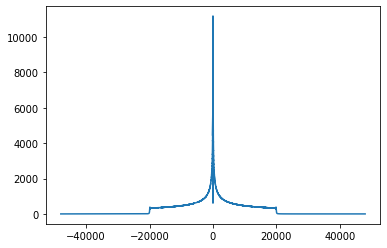

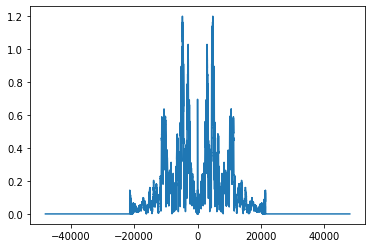

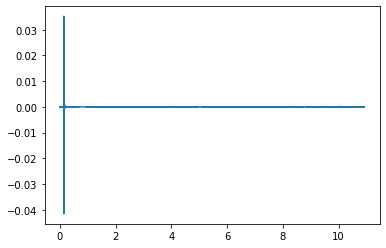

In [54]:
#import wav file for the pure sine sweep, guitar sine sweep, and room sine sweep.

fs, sine_sweep = wav.read('Sine Sweep.wav')
fs, guitar_sweep = wav.read('Guitar IR Sweep.wav')
fs, room_sweep_r = wav.read('Room IR Sweep Right.wav')
fs, room_sweep_l = wav.read('Room IR Sweep Left.wav')

pad_sine = np.zeros(2**20 - len(sine_sweep))
pad_guitar = np.zeros(2**20 - len(guitar_sweep))
pad_room = np.zeros(2**20 - len(room_sweep_r))

sine_sweep = np.concatenate([sine_sweep, pad_sine])
guitar_sweep = np.concatenate([guitar_sweep, pad_guitar])
room_sweep_r = np.concatenate([room_sweep_r, pad_room])
roon_sweep_l = np.concatenate([room_sweep_l, pad_room])


#Guitar_sweep = Y[n]
#Sine_sweep = X[n]



#Transforming both through the FFT will give us Y(jw) and X(jw) respectively.
#Through this we can try to obtain the impulse response transform H(jw) through Y(jw)/X(jw)

fn_fft = np.linspace(-fs/2, fs/2, len(sine_sweep))
sine_fft = fft.fft(sine_sweep)
guitar_fft = (fft.fft(guitar_sweep))
room_l_fft = (fft.fft(room_sweep_l))
room_r_fft = (fft.fft(room_sweep_r))

print(len(sine_fft))
print(len(fn_fft))
print('fft done')

plt.plot(fn_fft, np.abs(fft.fftshift(sine_fft)))

print(sine_fft)

plt.figure()

def find_IR(y, x):
    for i in range(0, len(x)):
        if(np.abs(x[i]) < 4.5): #Filter out near 0 frequencies on the pure sine sweep. This eliminates noise.
            x[i] = 100000000
    
    ir_fft = y/x
    plt.plot(fn_fft, np.abs(fft.fftshift(ir_fft)))
    toreturn = fft.ifft(ir_fft)
    return toreturn

guitar_ir = find_IR(guitar_fft, sine_fft)
n = np.arange(0, abs(2**20 / fs), 1/fs)

plt.figure()
plt.plot(n, guitar_ir)
wav.write('Guitar IR.wav', fs, guitar_ir.astype('float'))


